#  First Machine Learning Assignment

Based on the Linear Regression code from Siraj Raval (https://github.com/llSourcell/linear_regression_live), answer the following  questions: 


1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados no link: income.csvVisualizar o documento. Esse exemplo foi trabalhado em sala de aula. 
2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.
3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.
4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.
5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.
6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?
7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.


    

### 1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados aquiVisualizar o documento. Esse exemplo foi trabalhado em sala de aula. 

First lets copy the source code from the author github.

In [86]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(iterations=1000,lr=0.0001, inputfile="./income.csv", show=True):
    points = genfromtxt(inputfile, delimiter=",")
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = iterations
    if show:
        print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
        print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    if show:
        print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    if not show:
        return [b,m]



In order to find the slope (m and b) of the regression equation (*m*x + *b* + error), the algorithm iterate (1000 times) with a learning rate of 1x10^4. As shown in the execution below the algorithm fine b= -0.18 and m = 3 with an error = 103.

In [87]:
run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


#### 2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

To print the RSS for all iteration of the linear regression algorithm the method gradient_descent_runner() must be changed to print the error (RSS). 

In [88]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        if i <100 or i > 900:
            print("\t\t Iteration {0},RSS  = {1};".format(i,compute_error_for_line_given_points(b, m, points)))
    return [b, m]

run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
		 Iteration 0,RSS  = 2648.2381266261386;
		 Iteration 1,RSS  = 2381.1735926230144;
		 Iteration 2,RSS  = 2142.151013653971;
		 Iteration 3,RSS  = 1928.2259499305476;
		 Iteration 4,RSS  = 1736.7631314659504;
		 Iteration 5,RSS  = 1565.4039948653665;
		 Iteration 6,RSS  = 1412.0376287932477;
		 Iteration 7,RSS  = 1274.7747702022896;
		 Iteration 8,RSS  = 1151.924530990372;
		 Iteration 9,RSS  = 1041.9735683871631;
		 Iteration 10,RSS  = 943.5674424757678;
		 Iteration 11,RSS  = 855.4939311975465;
		 Iteration 12,RSS  = 776.6680973019634;
		 Iteration 13,RSS  = 706.1189232850785;
		 Iteration 14,RSS  = 642.9773496759485;
		 Iteration 15,RSS  = 586.4655693176774;
		 Iteration 16,RSS  = 535.8874457621318;
		 Iteration 17,RSS  = 490.61993774500473;
		 Iteration 18,RSS  = 450.105424101551;
		 Iteration 19,RSS  = 413.8448345756185;
		 Iteration 20,RSS  = 381.3915019021827;
		 Iteration 21,RSS  = 352.345659428784

PS: To reduce the verbosity of the algorithm output, only the first and last 100 values were printed.

#### 3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.

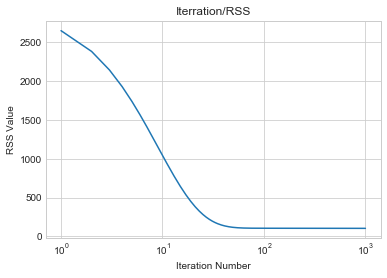

In [95]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    x = []
    y = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        x.append(i+1)
        y.append(compute_error_for_line_given_points(b, m, points))
    
    
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    plt.plot(x, y)
    plt.title("Iterration/RSS")
    plt.xlabel("Iteration Number")
    plt.ylabel("RSS Value")
    plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    

    return [b, m]

a=run(show=False)

As illustrated in the figure above the RSS value fades rapidly until iteration number 100, and from that iteration, the RSS value decrease in a slow ratio (almost stabilized in 112).

#### 4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

In [97]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m]

In [106]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

for llr in [0.001,0.002,0.003,0.004,0.005]:
    for i in [500,5000,10000,15000,30000,50000]:
        ws = run(iterations=i,lr=llr,show=False)
        w0,w1 = ws[0],ws[1]
        if (w0 >= -39.5 and w0 < -38.8) and (w1 >= 5 and w1 <6):
            print("Iteration {0},Learning Rate  = {1};".format(i,llr))
            print("\t [w0={0}, w1={1}]\n".format(w0,w1))

Iteration 50000,Learning Rate  = 0.001;
	 [w0=-39.10519020198799, w1=5.579179883407752]

Iteration 30000,Learning Rate  = 0.002;
	 [w0=-39.31453290150513, w1=5.591641626701886]

Iteration 50000,Learning Rate  = 0.002;
	 [w0=-39.44332337128485, w1=5.599308260297552]

Iteration 15000,Learning Rate  = 0.003;
	 [w0=-38.897738890893926, w1=5.566830730603052]

Iteration 30000,Learning Rate  = 0.003;
	 [w0=-39.438666405196905, w1=5.599031040618761]

Iteration 50000,Learning Rate  = 0.003;
	 [w0=-39.446231462889585, w1=5.599481373050649]



#### 5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

In [39]:
def run(gradient_threshold=0.1,lr=0.0001, inputfile="./income.csv", show=True , plot=True):
    points = genfromtxt(inputfile, delimiter=",")
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    if show:
        print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
        print("Running...")
    [b, m , i] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, gradient_threshold, plot=plot)
    if show:
        num_iterations = i
        print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    if not show:
        return [b,m,i]

In [40]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m, b_gradient, m_gradient]

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...


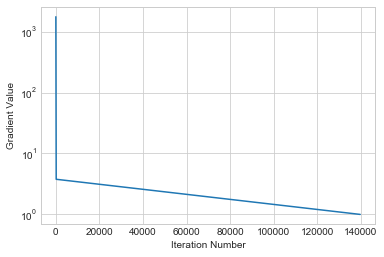

After 139721 iterations b = -28.950316961307475, m = 4.974681021963283, error = 35.08600903586175


In [51]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, gradient_threshold, plot=False):
    b = starting_b
    m = starting_m
    x = []
    y = []
    i = 0

    gmodulus = 1 + gradient_threshold
    
    while gmodulus >= gradient_threshold:
        b, m , gb , gm = step_gradient(b, m, array(points), learning_rate)
        #new modulus
        gmodulus = math.sqrt(gb**2 + gm**2)
        
        #plot part
        x.append(i+1)
        y.append(gmodulus)
        i+=1

    
    if plot:
        import matplotlib.pyplot as plt
        plt.style.use('seaborn-whitegrid')
        plt.plot(x, y)
        #plt.xscale('log')
        plt.yscale('log')
        plt.xlabel("Iteration Number")
        plt.ylabel("Gradient Value")

        plt.show()
    
    
    return [b, m ,i]

run(gradient_threshold=1)

#### 6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

In [73]:
import time

gt = 1
w0 = -40
w1 = 8


start_time = time.time()

while (w0 < -38) and (w1 >= 5):
    gt = gt-0.1
    w0,w1,i = run(gradient_threshold=gt,plot=False,show=False)

end_time = time.time()   
coeftime = end_time - start_time
print("After {0} iterations b = {1}, m = {2} with modulus threshold = {3} (execution time = {4}s)".format(i, w0, w1,gt,coeftime))

After 150799 iterations b = -29.999889277337726, m = 5.037159918056469 with modulus threshold = 0.9 (execution time = 14.372795104980469s)


#### 7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.*

In [78]:
def nomalEquation(points):
    temp_x = 0
    temp_y = 0
    b = 0
    m = 0
    N = len(points)
    
    for i in range(0, N):
        x_i = points[i, 0]
        y_i = points[i, 1]
        temp_x += x_i
        temp_y += y_i
        
    x = temp_x / float(N)
    y = temp_y / float(N)
    
    for i in range(0, N):
        xi = points[i, 0]
        yi = points[i, 1]
        b = b + (x_i - x) * (y_i - y)
        m = m + (x_i - x)**2
        
    w1 = b/m
    w0 = y - w1*x
    return [w0,w1]

In [79]:
def run(inputfile="./income.csv", show=True):
    points = genfromtxt(inputfile, delimiter=",")
    
    if show:
        print("Running...")
        
    [b, m] = nomalEquation(points)
    
    if show:
        print("b = {0}, m = {1}, error = {2}".format(b, m, compute_error_for_line_given_points(b, m, points)))
    if not show:
        return [b,m]
run()

Running...
b = -30.161467210721675, m = 5.019183532346513, error = 34.148888021867066
